In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mnist

In [2]:
# load data
x_train, t_train, x_test, t_test = mnist.load()

In [3]:
x_train.shape, t_train.shape

((60000, 784), (60000,))

In [4]:
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

[]

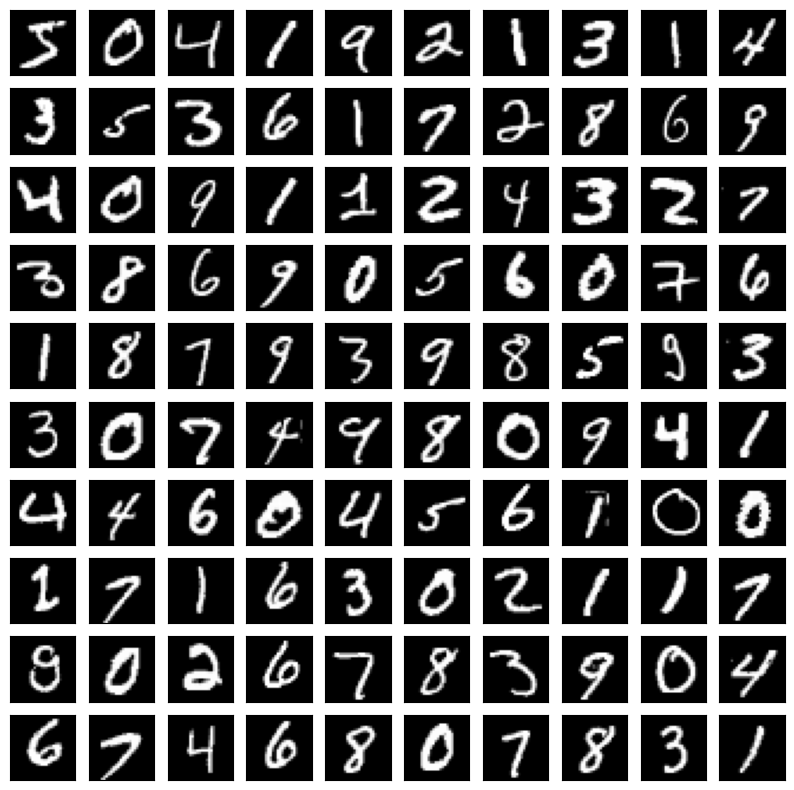

In [5]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(x_train[i*10 + j, :].reshape(28, 28), cmap='gray')
plt.setp(axs, xticks=[], yticks=[])

In [6]:
digit_1 = 0
digit_2 = 9
x_digit = x_train[np.where((t_train == digit_1) | (t_train == digit_2)), :].squeeze()
labels = t_train[np.where((t_train == digit_1) | (t_train == digit_2))]

# x_digit = x_train
# labels = t_train

In [9]:
x_digit.shape

(11872, 784)

[]

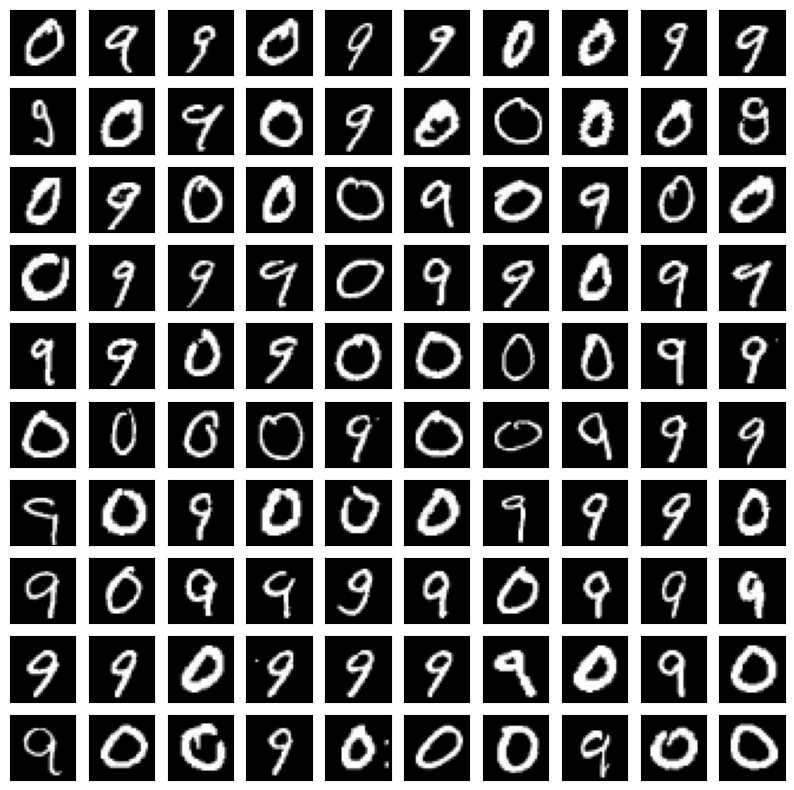

In [7]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(x_digit[i*10 + j, :].reshape(28, 28), cmap='gray')
plt.setp(axs, xticks=[], yticks=[])

In [10]:
# Steps 1 and 2: normalise the data
mean = np.mean(x_digit, 0)
std = np.std(x_digit, 0)
std[std == 0] = 1

x = (x_digit - mean) / std

In [29]:
# Step 3a: compute covariance matrix
# note the data here is N x D
S = x.T @ x / x.shape[0]
Sbar = x @ x.T / x.shape[0]

In [31]:
S.shape, Sbar.shape

((784, 784), (11872, 11872))

[]

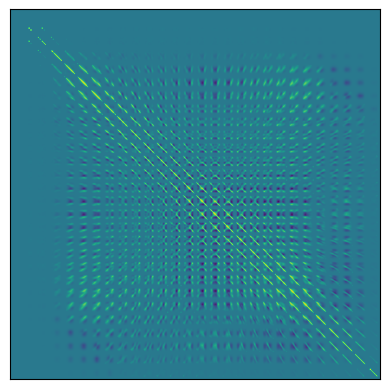

In [12]:
fig, ax = plt.subplots(1, 1)
ax.imshow(S)
plt.setp(ax, xticks=[], yticks=[])

In [14]:
#Step 3b find eigendecomposition
eigvals, eigvecs = np.linalg.eig(S)

idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx].astype(np.float32)
eigvecs = eigvecs[:,idx].astype(np.float32)

/var/folders/10/nd8grf6909zczgl0zjd_9c7042nn1z/T/ipykernel_30675/320947620.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  eigvals = eigvals[idx].astype(np.float32)
/var/folders/10/nd8grf6909zczgl0zjd_9c7042nn1z/T/ipykernel_30675/320947620.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  eigvecs = eigvecs[:,idx].astype(np.float32)


Text(0, 0.5, 'total variance captured')

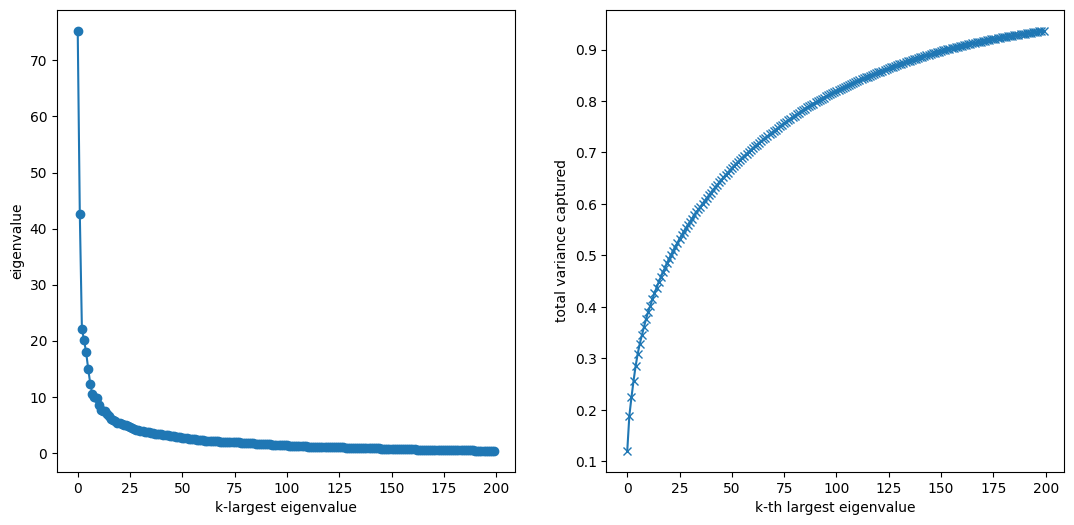

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
axs[0].plot(eigvals[:200], marker='o')
axs[0].set_xlabel("k-largest eigenvalue")
axs[0].set_ylabel("eigenvalue")

axs[1].plot(np.cumsum(eigvals)[:200] / np.sum(eigvals), marker='x')
axs[1].set_xlabel("k-th largest eigenvalue")
axs[1].set_ylabel("total variance captured")

In [16]:
# low dimensional projection
M = 2
z = x @ eigvecs[:, :M]

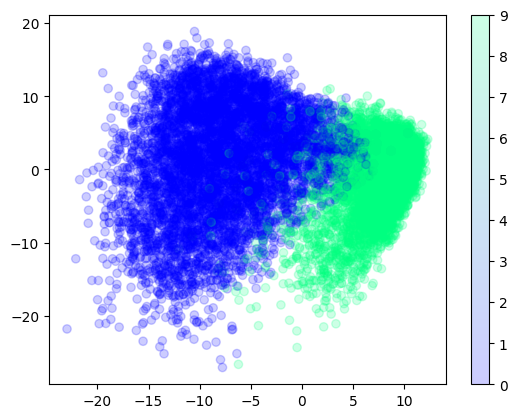

In [17]:
sc = plt.scatter(z[:, 0], z[:, 1], c=labels, cmap='winter', alpha=0.2)
plt.colorbar(sc)

In [22]:
# reconstruction using more principal components
M = 100
z = x @ eigvecs[:, :M]
xtilde = z @ eigvecs[:, :M].T
# rescale
xtilde = xtilde * std + mean

In [26]:
xtilde.shape, x_digit.shape

((11872, 784), (11872, 784))

[]

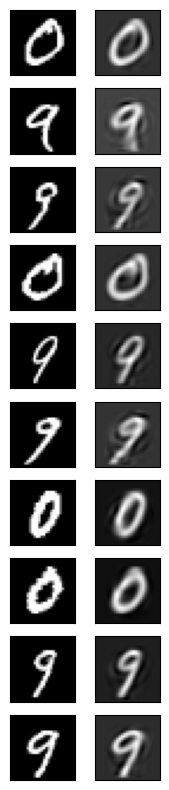

In [23]:
fig, axs = plt.subplots(10, 2, figsize=(2,10))
for i in range(10):
    axs[i, 0].imshow(x_digit[i, :].reshape(28, 28), cmap='gray')
    axs[i, 1].imshow(xtilde[i, :].reshape(28, 28), cmap='gray')
plt.setp(axs, xticks=[], yticks=[])